In [19]:
# importing panda library 
import pandas as pd

# loading the files into data frames
cab_data = pd.read_csv('C:/Users/bilga/Downloads/Cab_Data.csv')
customer_data = pd.read_csv('C:/Users/bilga/Downloads/Customer_ID.csv')
city_data = pd.read_csv('C:/Users/bilga/Downloads/City.csv')
transaction_data = pd.read_csv('C:/Users/bilga/Downloads/Transaction_ID.csv')

cab_data.head()
customer_data.head()
city_data.head()
transaction_data.head()

cab_data.info()
customer_data.info()
city_data.info()
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [4]:
# checking for duplicates
print("Cab Data duplicates: ", cab_data.duplicated().sum())
print("Customer Data duplicates:", customer_data.duplicated().sum())
print("City Data duplicates:", city_data.duplicated().sum())
print("Transaction Data duplicates:", transaction_data.duplicated().sum())

# Remove duplicates if found
cab_data = cab_data.drop_duplicates()
customer_data = customer_data.drop_duplicates()
city_data = city_data.drop_duplicates()
transaction_data = transaction_data.drop_duplicates()

Cab Data duplicates:  0
Customer Data duplicates: 0
City Data duplicates: 0
Transaction Data duplicates: 0


In [5]:
# checking for missing values
print("Missing values in Cab Data: \n", cab_data.isna().sum())
print("Missing values in Customer Data:\n", customer_data.isna().sum())
print("Missing values in City Data:\n", city_data.isna().sum())
print("Missing values in Transaction Data:\n", transaction_data.isna().sum())

Missing values in Cab Data: 
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Missing values in Customer Data:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Missing values in City Data:
 City          0
Population    0
Users         0
dtype: int64
Missing values in Transaction Data:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [22]:
# merging cab_data and transaction_data -- transactionID as the key
master_data = pd.merge(cab_data, transaction_data, on = 'Transaction ID', how = 'inner')

# displaying the first few rows of the merged data
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [23]:
# merging the data previously to the customer data
master_data = pd.merge(master_data, customer_data, on='Customer ID', how='inner')


# displaying the first few rows of the merged data
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [24]:
# merging results with city_data
master_data = pd.merge(master_data, city_data, on='City', how='inner')

# displaying the first few rows of the final master data
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [9]:
# verifying the master data by checking for any duplicates and missing values
print("Master Data duplicates: ", master_data.duplicated().sum())
print("Missing values in Master Data: \n", master_data.isna().sum())

Master Data duplicates:  0
Missing values in Master Data: 
 Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


In [10]:
# saving the master data
master_data.to_csv('C:/Users/bilga/Downloads/Clean_Master_Data.csv', index=False)

In [11]:
# Extracting Insights In Master Data

# overview of master data to identify its mean, median, min, max, standard deviation, etc.
master_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


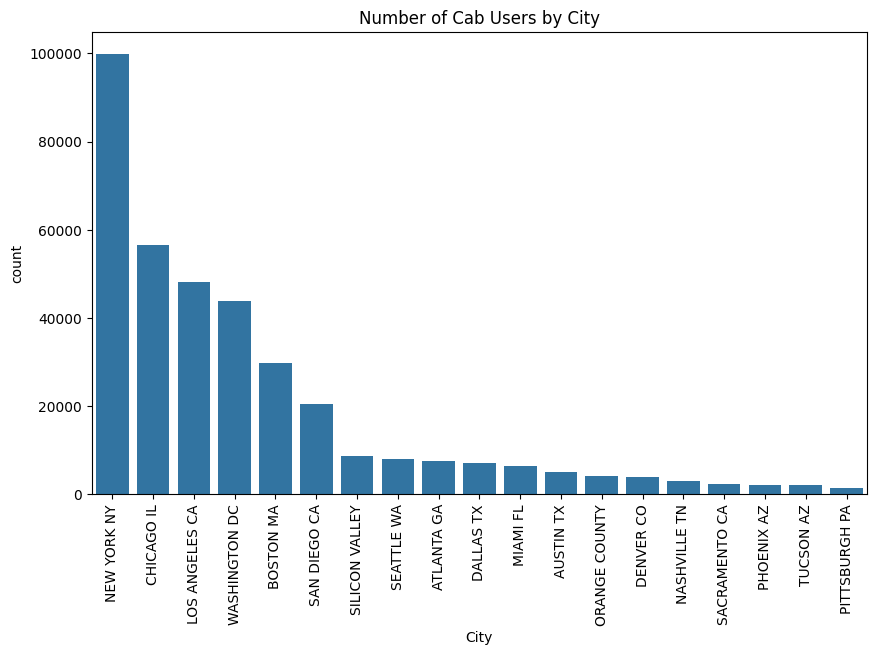

In [27]:
# Data Visualization

# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# plotting distribution of cab users by city
plt.figure(figsize=(10, 6))
sns.countplot(data=master_data, x='City', order=master_data['City'].value_counts().index)
plt.title('Number of Cab Users by City')
plt.xticks(rotation=90)
plt.show()

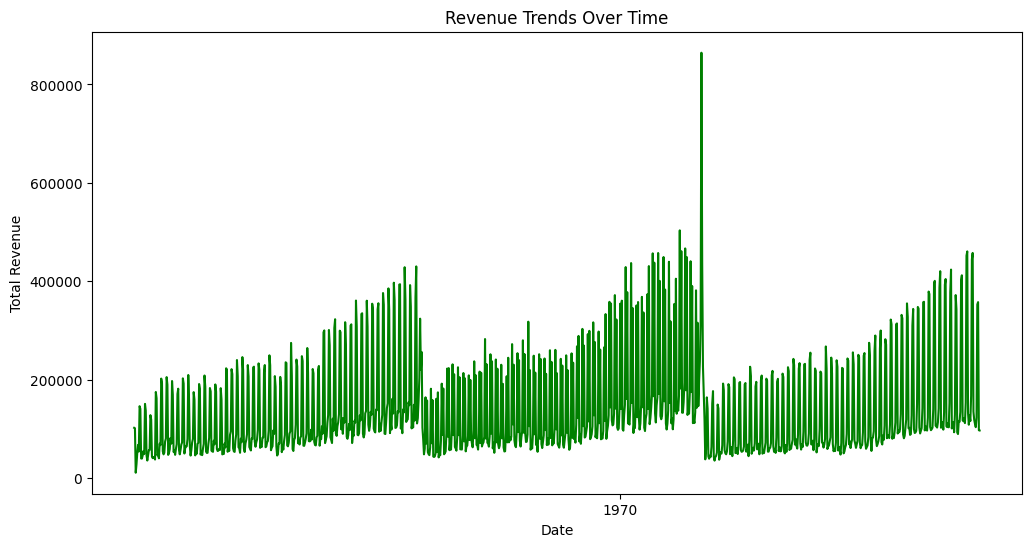

In [28]:
# Plotting Revenue Trends Over Time
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])
revenue_trend = master_data.groupby('Date of Travel')['Price Charged'].sum()

plt.figure(figsize=(12, 6))
plt.plot(revenue_trend, color='green')
plt.title('Revenue Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show() 

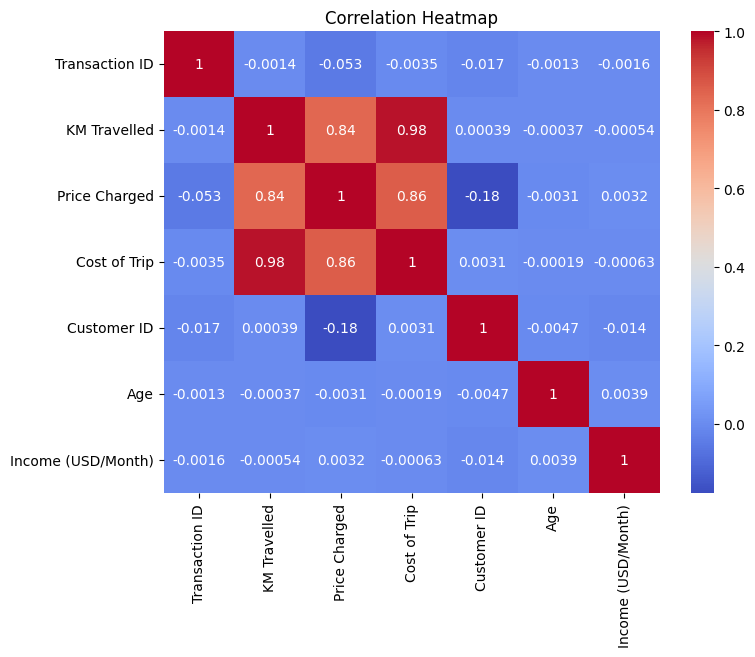

In [29]:
# Correlation Analysis

# selecting only the numerical columns 
numerical_data = master_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [105]:
# Potential Hypotheses
# 1. The company with the higher number of users also has the highest revenue
# 2. Cab usage increases on holidays/weekends than regular days
# 3. Longer trips generate more revenue for the cab company
# 4. Revenue is ultimately correlated with the population of its city
# 5. People with highest incomes are most likely to use cabs than lower income bracket people



In [31]:
# Company Performance Analysis
master_data['Revenue'] = master_data['Price Charged']
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

# grouping by company and calculating the total revenue and profit
company_performance = master_data.groupby('Company')[['Revenue', 'Profit']].sum().reset_index()
print(company_performance)

      Company       Revenue        Profit
0    Pink Cab  2.632825e+07  5.307328e+06
1  Yellow Cab  1.258539e+08  4.402037e+07


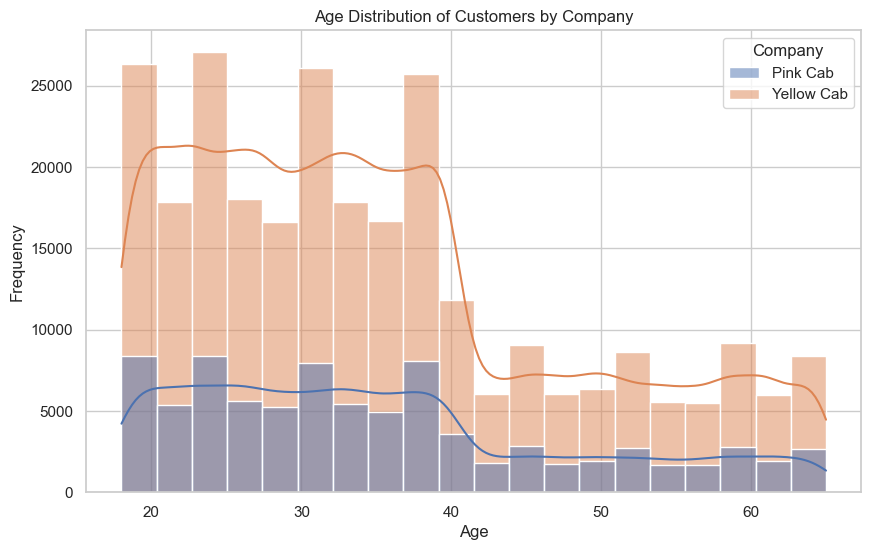

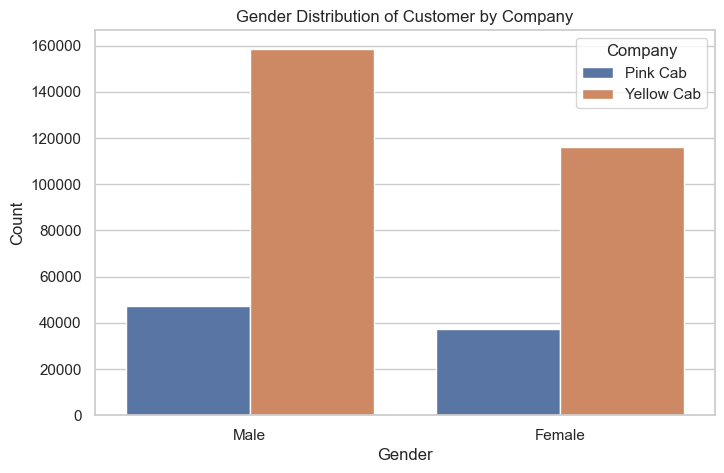

In [96]:
# Company Demographics Analysis

# age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=master_data, x='Age', hue='Company', kde=True, bins=20)
plt.title('Age Distribution of Customers by Company')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# gender distribution
plt.figure(figsize=(8,5))
sns.countplot(data=master_data, x='Gender', hue = 'Company')
plt.title('Gender Distribution of Customer by Company')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [100]:
# Testing Hypotheses
# Hypothesis 1: the company with the higher number of users also has the highest revenue

# grouping by company and number of unique users
company_users = master_data.groupby('Company')['Customer ID'].nunique().reset_index()
company_users.columns = ['Company', 'Number of Users']

# merging the user count data with the performance data for each company
company_analysis = pd.merge(company_performance, company_users, on='Company')
print(company_analysis)

      Company       Revenue        Profit  Number of Users
0    Pink Cab  2.632825e+07  5.307328e+06            32330
1  Yellow Cab  1.258539e+08  4.402037e+07            39896


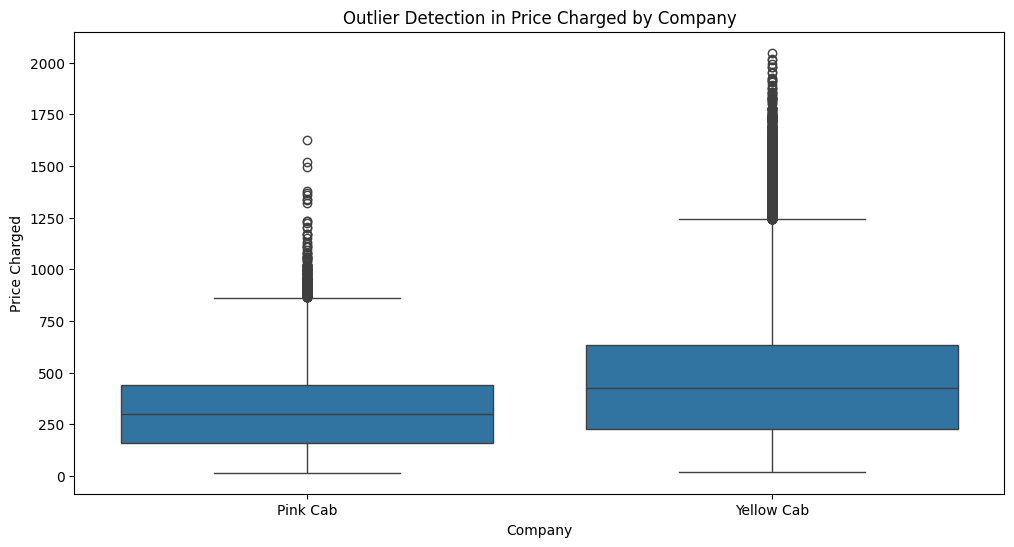

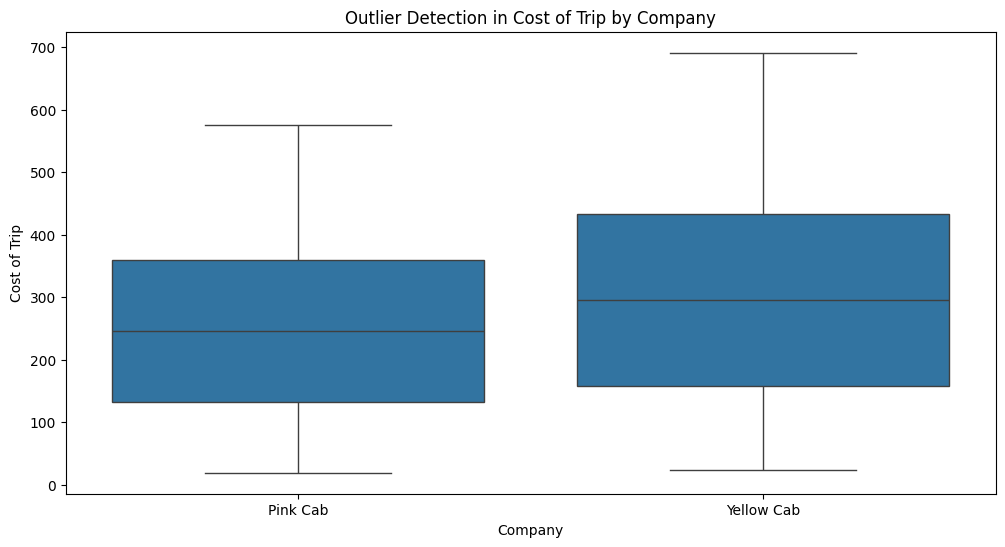

In [34]:
# Checking for Outliers
# checking in Price Charged and Cost of Trip
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data, x='Company', y='Price Charged')
plt.title('Outlier Detection in Price Charged by Company')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data, x='Company', y='Cost of Trip')
plt.title('Outlier Detection in Cost of Trip by Company')
plt.show()

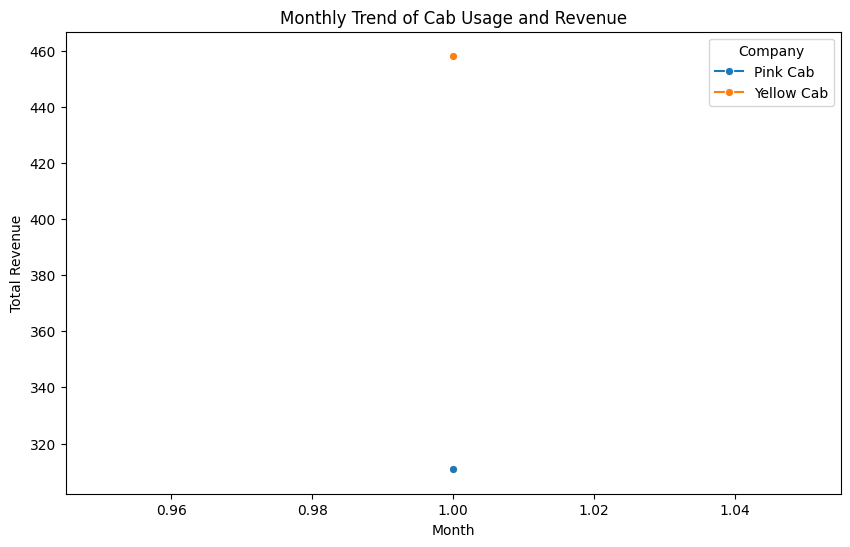

In [35]:
# Identifying Seasonality and Trends
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])

# extracting month and year from 'Date of Travel' for trend analysis
master_data['Month'] = master_data['Date of Travel'].dt.month
master_data['Year'] = master_data['Date of Travel'].dt.year

# plotting 
plt.figure(figsize=(10, 6))
sns.lineplot(data=master_data, x='Month', y='Revenue', hue='Company', marker='o')
plt.title('Monthly Trend of Cab Usage and Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [39]:
# creating a sample list of holidays: new year, independence day, christmas
holidays = {
    '2016': ['2016-01-01', '2016-07-04', '2016-12-25'],  
    '2017': ['2017-01-01', '2017-07-04', '2017-12-25'],
    '2018': ['2018-01-01', '2018-07-04', '2018-12-25']
}

# converting the holidays to data frame
holiday_df = pd.DataFrame([(date, year) for year, dates in holidays.items() for date in dates], columns=['Date', 'Year'])

# converting to datetime format
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'])

# merging the 'Date of Travel' column in your cab data is in datetime format
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])

# Merge to create a new column 'is_holiday'
merged_data = cab_data.merge(holiday_df, left_on='Date of Travel', right_on='Date', how='left', indicator=True)

# Create 'is_holiday' column
merged_data['is_holiday'] = merged_data['_merge'] == 'both'


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

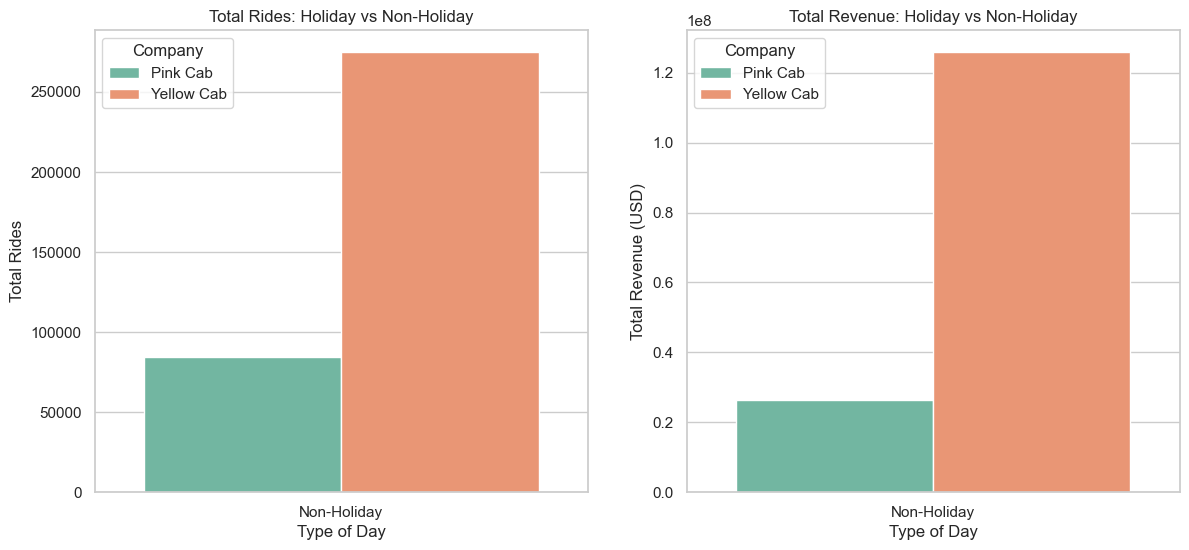

In [103]:
# Hypothesis Testing
# Hypothesis 2: Cab usage increases on holidays than regular days

# Recalculate the data for holiday usage by cab company
holiday_usage_by_company = merged_data.groupby(['is_holiday', 'Company']).agg(
    total_rides=('Transaction ID', 'count'),
    total_revenue=('Price Charged', 'sum')
).reset_index()

# Convert boolean to meaningful labels
holiday_usage_by_company['is_holiday'] = holiday_usage_by_company['is_holiday'].replace({True: 'Holiday', False: 'Non-Holiday'})

# Plotting the number of rides with hue to differentiate companies
plt.figure(figsize=(14, 6))

# Plot for Total Rides
plt.subplot(1, 2, 1)
sns.barplot(x='is_holiday', y='total_rides', hue='Company', data=holiday_usage_by_company, palette='Set2')
plt.title('Total Rides: Holiday vs Non-Holiday')
plt.xlabel('Type of Day')
plt.ylabel('Total Rides')
plt.legend(title='Company')

# Plot for Total Revenue
plt.subplot(1, 2, 2)
sns.barplot(x='is_holiday', y='total_revenue', hue='Company', data=holiday_usage_by_company, palette='Set2')
plt.title('Total Revenue: Holiday vs Non-Holiday')
plt.xlabel('Type of Day')
plt.ylabel('Total Revenue (USD)')
plt.legend(title='Company')

plt.tight_layout

   Price Charged  Cost of Trip  Profit_Margin
0         370.95       313.635      15.450869
1         358.52       334.854       6.601026
2         125.20        97.632      22.019169
3         377.40       351.602       6.835718
4         114.62        97.776      14.695516


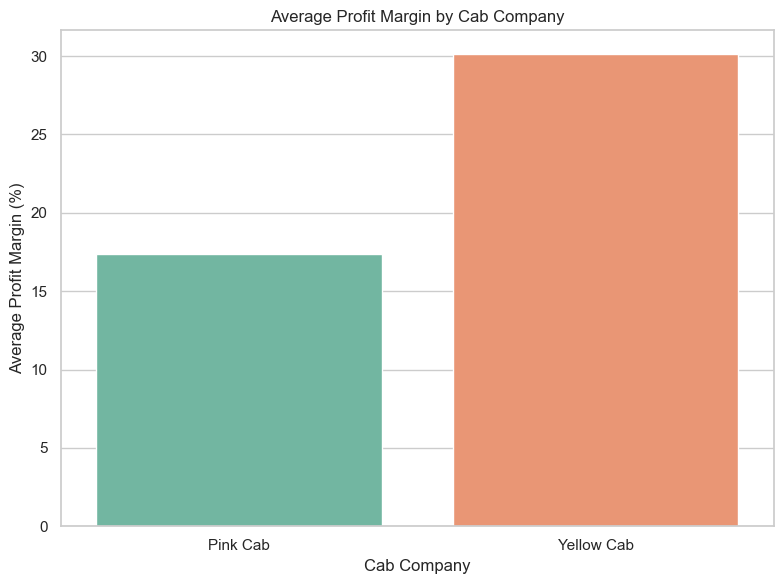

In [53]:
# Calculating the Profit Margin
cab_data['Profit_Margin'] = ((cab_data['Price Charged'] - cab_data['Cost of Trip']) / cab_data['Price Charged']) * 100

# review
print(cab_data[['Price Charged', 'Cost of Trip', 'Profit_Margin']].head())

# calcuating the average profit margin by company
average_profit_margin = cab_data.groupby('Company')['Profit_Margin'].mean().reset_index()

# Plotting average profit margin
plt.figure(figsize=(8, 6))
sns.barplot(data=average_profit_margin, x='Company', y='Profit_Margin', hue='Company', palette='Set2', legend=False)
plt.title('Average Profit Margin by Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Average Profit Margin (%)')
plt.tight_layout()
plt.show()

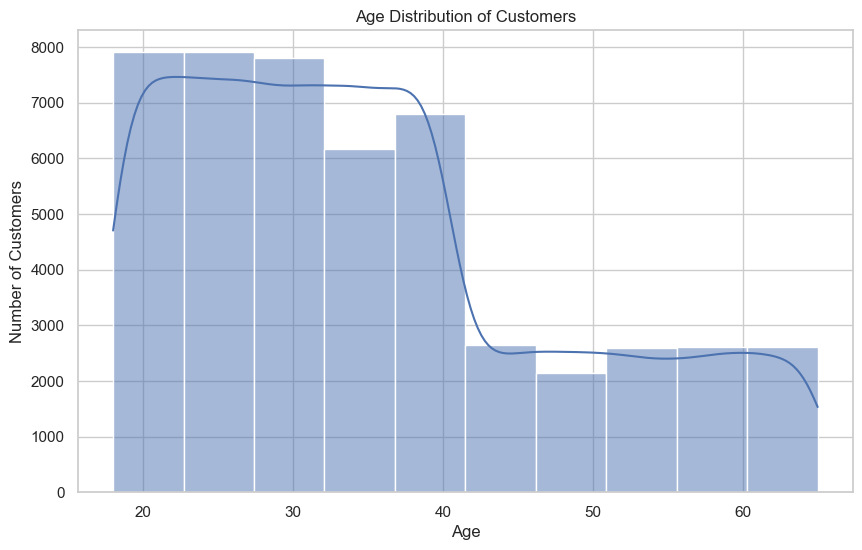

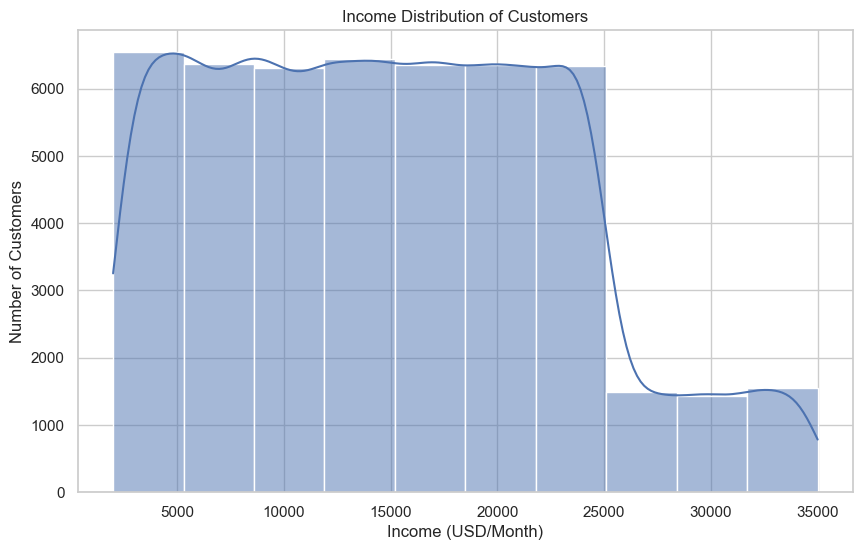

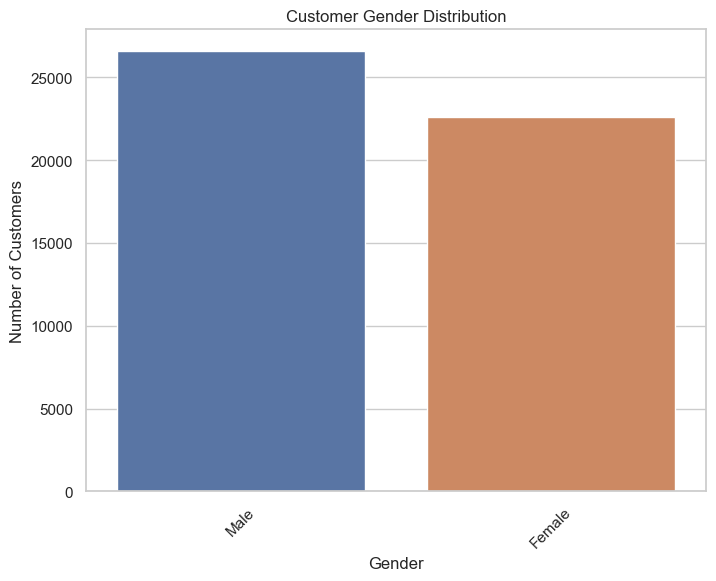

       Age  Income (USD/Month)  Customer Count
0       18                2027               1
1       18                2044               1
2       18                2056               1
3       18                2059               1
4       18                2079               1
...    ...                 ...             ...
47966   65               34434               1
47967   65               34472               1
47968   65               34477               1
47969   65               34568               1
47970   65               34936               1

[47971 rows x 3 columns]


In [106]:
# Customer Segmentation
# defining customer segments by their age, income and gender

# 2. Age Distribution
# Hypothesis 5: People with highest incomes are most likely to use cabs than lower income bracket people
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 3. Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Income (USD/Month)'], bins=10, kde=True)
plt.title('Income Distribution of Customers')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Number of Customers')
plt.show()

# 4. Gender Breakdown
gender_counts = customer_data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 5. Customer Counts by Age and Income
age_income_counts = customer_data.groupby(['Age', 'Income (USD/Month)']).size().reset_index(name='Customer Count')
print(age_income_counts)


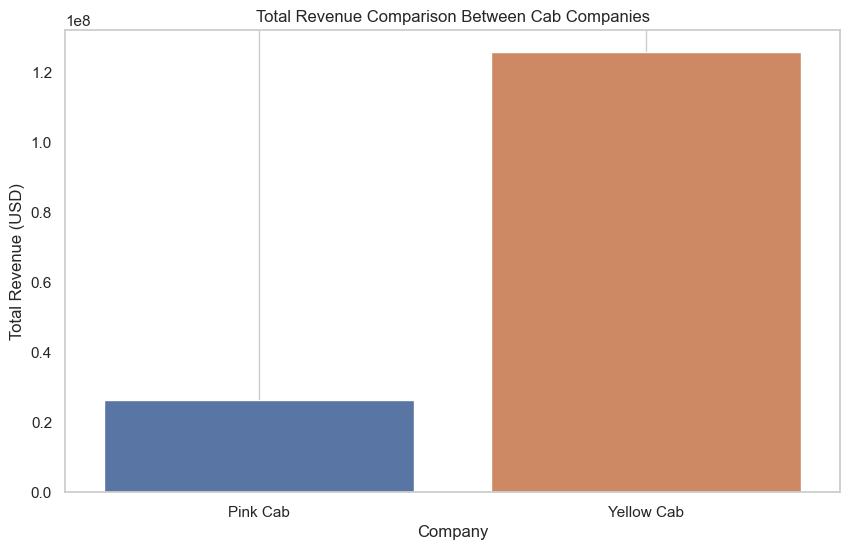

In [91]:
# Cab Compnay Revenue Comparison
revenue_comparison = master_data.groupby('Company')['Price Charged'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Price Charged', hue='Company', data=revenue_comparison)
plt.title('Total Revenue Comparison Between Cab Companies')
plt.ylabel('Total Revenue (USD)')
plt.grid()
plt.show()

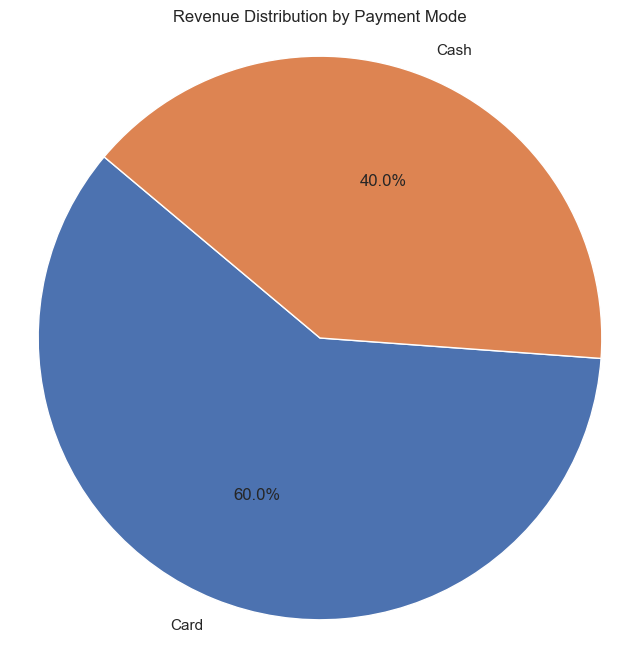

In [86]:
# Revenue by Payment Method
revenue_payment_mode = master_data.groupby('Payment_Mode')['Price Charged'].sum()
plt.figure(figsize=(8, 8))
plt.pie(revenue_payment_mode, labels=revenue_payment_mode.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Payment Mode')
plt.axis('equal')
plt.show()



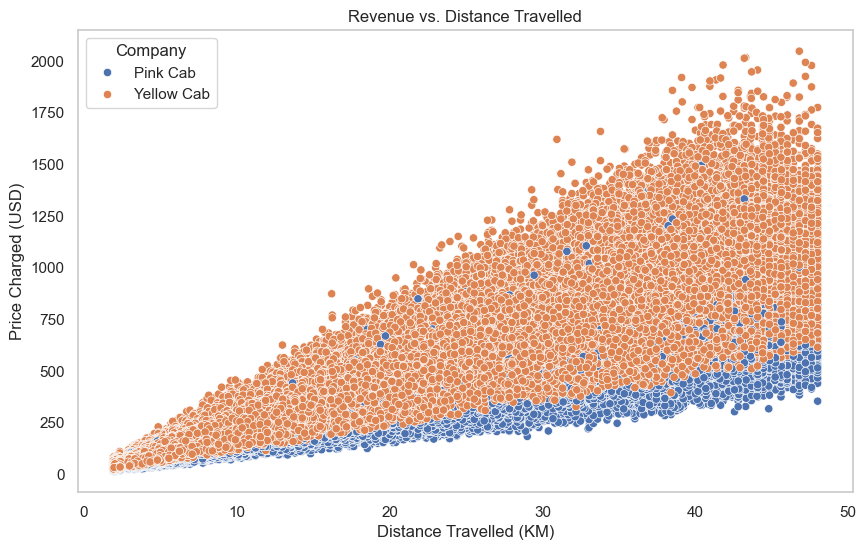

In [90]:
# Hypothesis Testing: Revenue vs Distance Travelled
# Hypothesis 3: Longer trips generate more revenue for the cab company

plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM Travelled', y='Price Charged', hue='Company', data=master_data)
plt.title('Revenue vs. Distance Travelled')
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Price Charged (USD)')
plt.grid()
plt.show()


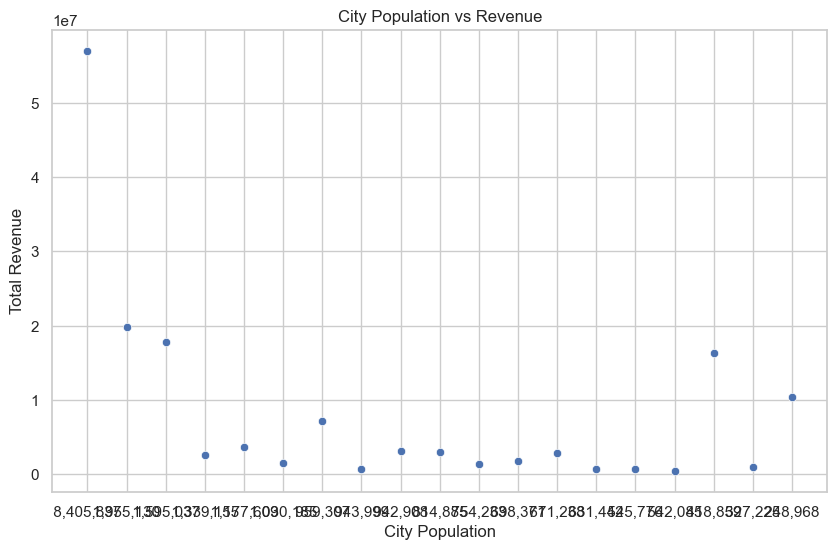

In [98]:
# Hypothesis Testing: Revenue vs City Population
# Hypothesis 4: Revenue is correlated with the population of its city
city_revenue = master_data.groupby('City')['Price Charged'].sum().reset_index()
city_population = city_data[['City', 'Population']].merge(city_revenue, on='City')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Price Charged', data=city_population)
plt.title('City Population vs Revenue')
plt.xlabel('City Population')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
# Hypothesis Results

# Hypothesis 1: The company with the highest number of users also has the highest revenue
# Result: Observing the data results, while having the lowest number of users, 
# Pink Cab has the highest revenue compared to Yellow Cab.

# Hypothesis 2: Cab usage increases on holidays compared to regular days
# Result: Yellow Cab leads in the revenue.

# Hypothesis 3: Longer trips generate more revenue for the cab company
# Results: Comparing the graph results, Yellow Cab generates more revenue with longer distance trips

# Hypothesis 4: Revenue is correlated with the population of its city
# Results: ALthough the top 3 cities with most population density holds the highest revenue, 
# the lowest population cities also seem to have a spike in revenue.

# Hypothesis 5: People with highest incomes are most likely to use cabs than lower income bracket people
# Result: According to the Number of Customer vs Income graph, we can identify that the people with 
# high income have the lowes number of cab customers, where lowest to middle income bracket people using more cabs.